In [469]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# **1. Data Preparation**

In [470]:
# Creating a dataframe by loading the CSV file into read form

df=pd.read_csv("/content/Algerian_forest_fires_cleaned.csv")

In [471]:
df   # showing the dataframe

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [472]:
# Checking for null values and taking sum in all columns

df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [473]:
# Getting information about dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [474]:
# Seeing for column names

df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [475]:
df.duplicated().sum()      # Checking if there are any duplicate values

0

In [476]:
# Descriptive analysis

df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [477]:
df_1=df.drop(['day','month','year','Classes'],axis=1)  # Dropping the uneccessary columns
df_1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


<ipython-input-478-82281259e436>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


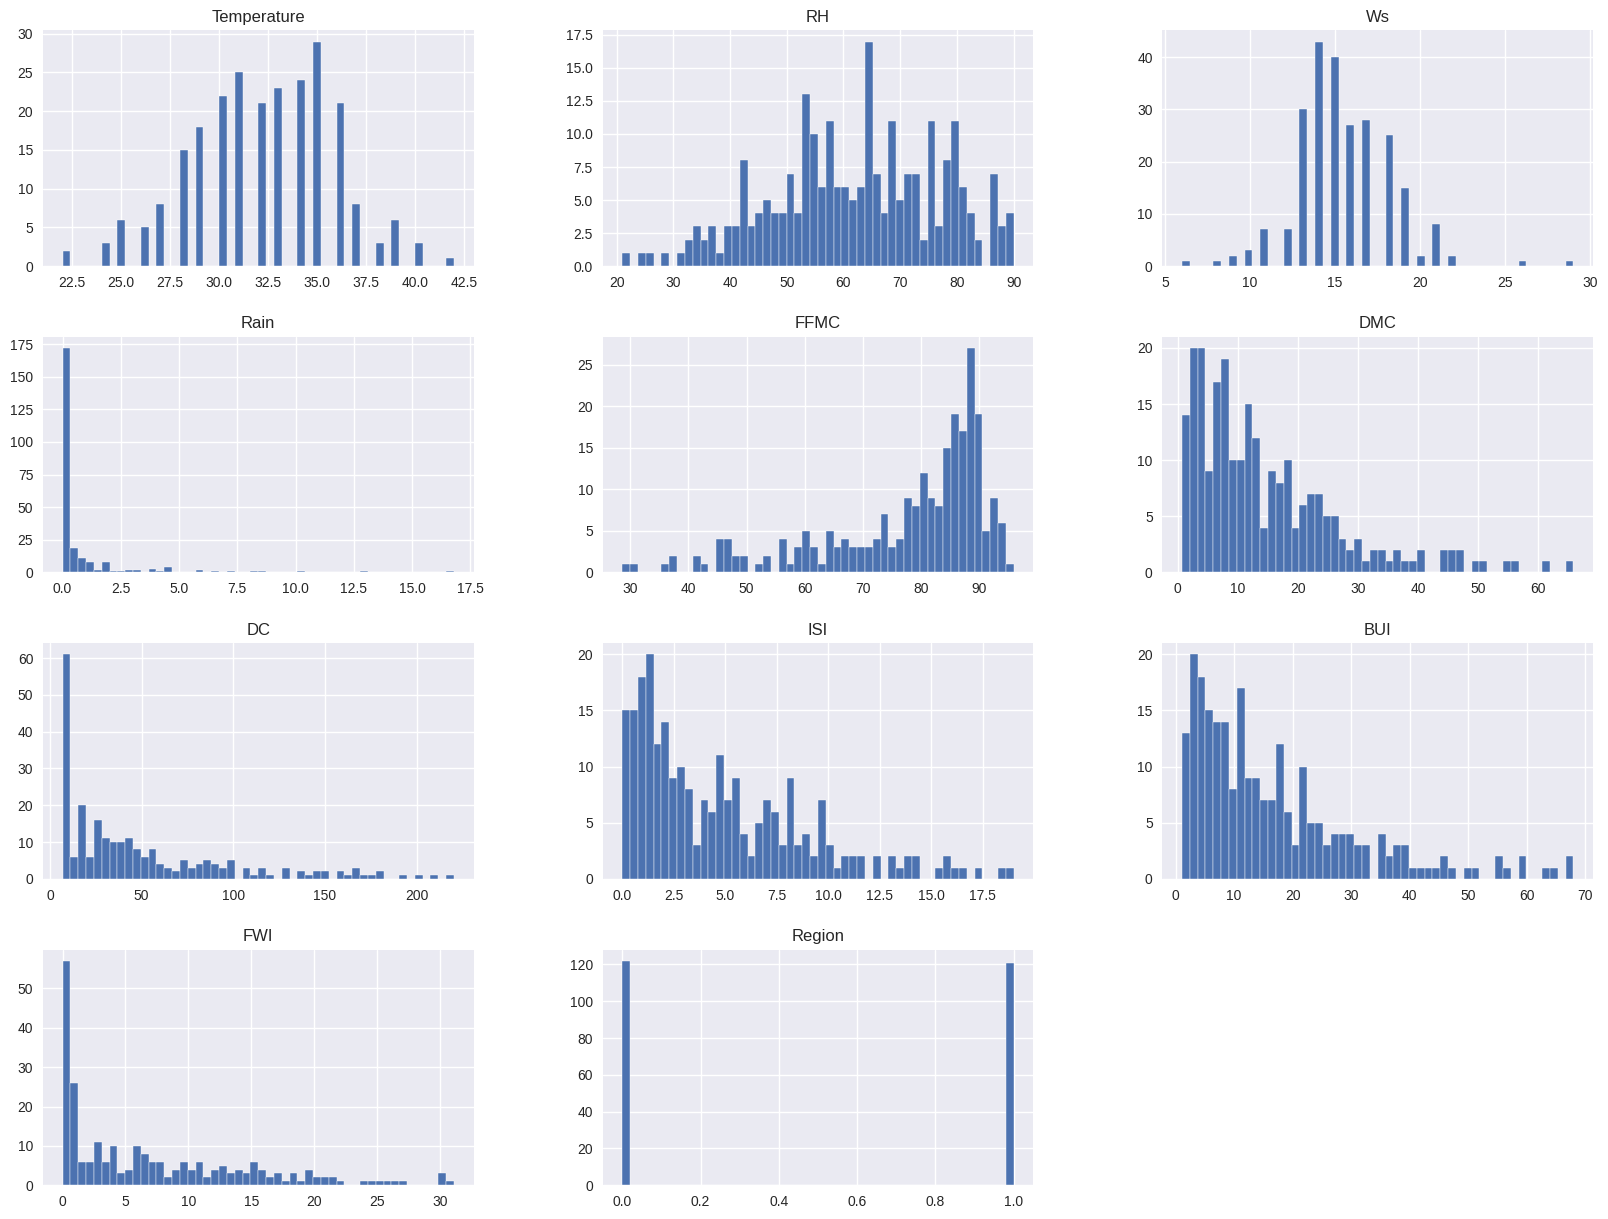

In [478]:
# Creating histograms(Density plots) for all features (This is to check the frequency distribution of each feature)

plt.style.use('seaborn')
df_1.hist(bins=50,figsize=(20,15))
plt.show()

<Axes: >

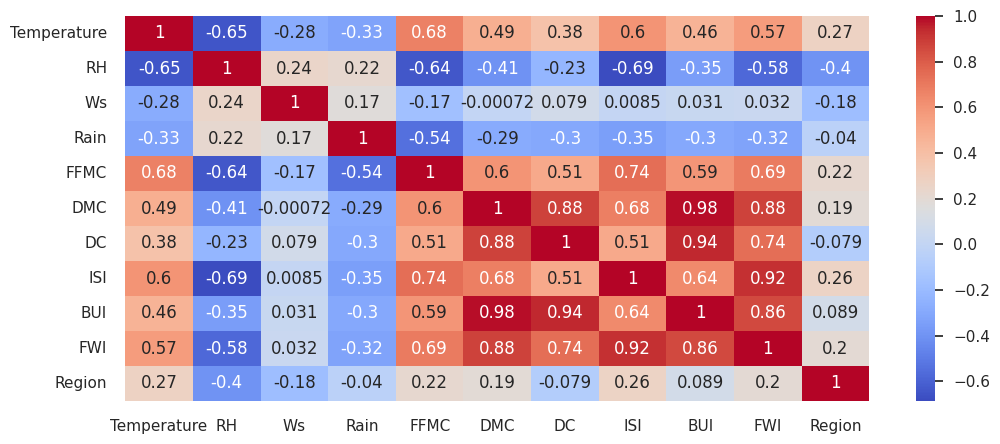

In [479]:
# Plotting heatmap to check the correlations among features

sns.set(rc={'figure.figsize':(12, 5)})                     # To adjust the width and height as needed
sns.heatmap(df_1.corr(), cmap='coolwarm', annot=True)

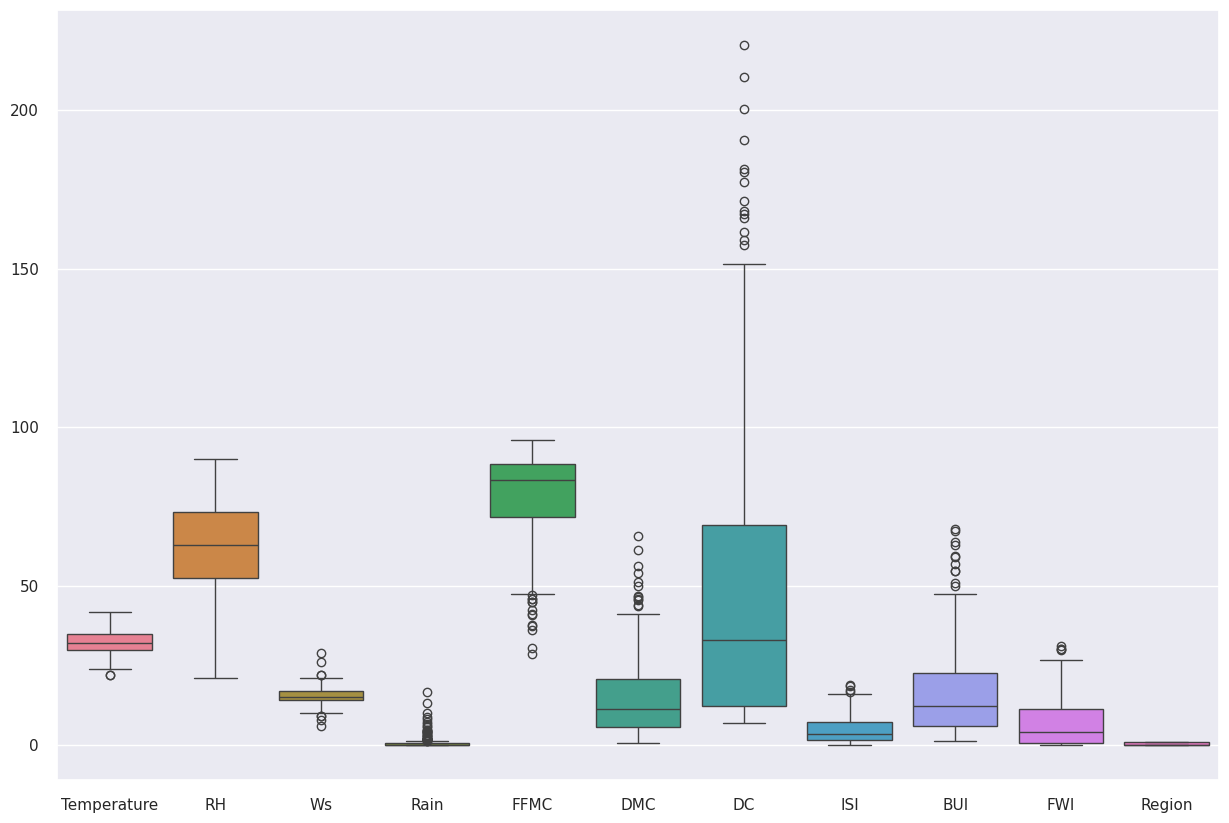

In [480]:
# Creating boxplots to check for the outliers

plt.figure(figsize=(15, 10))
sns.boxplot(data=df_1)
plt.show()

In [481]:
# Removing the outliers

df=df_1.copy()    # Creating copy of the original dataframe

# Define the function to remove outliers using IQR
def remove_outliers_iqr(df):
    q1 = np.percentile(df, 25)
    q3 = np.percentile(df, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    cleaned_data = df[(df >= lower_bound) & (df <= upper_bound)]
    return cleaned_data

# Remove outliers using IQR
cleaned_data_iqr = remove_outliers_iqr(df)

print("Original data:", df)
print("Cleaned data using IQR method:", cleaned_data_iqr)

Original data:      Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  Region
0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5       0
1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4       0
2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1       0
3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0       0
4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5       0
..           ...  ..  ..   ...   ...   ...   ...  ...   ...  ...     ...
238           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5       1
239           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0       1
240           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2       1
241           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7       1
242           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5       1

[243 rows x 11 columns]
Cleaned data using IQR method:      Temperature    RH  Ws  Rain  FFMC   DMC    DC  I

Now the outilers have been removed and those data points are filled with null values

In [482]:
# Filling the null values with median values of the corresponding columns

df_cleaned = cleaned_data_iqr.fillna(df_1.median())
df_cleaned

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57.0,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61.0,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82.0,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,63.0,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77.0,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65.0,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
239,28,63.0,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
240,27,63.0,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
241,24,54.0,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


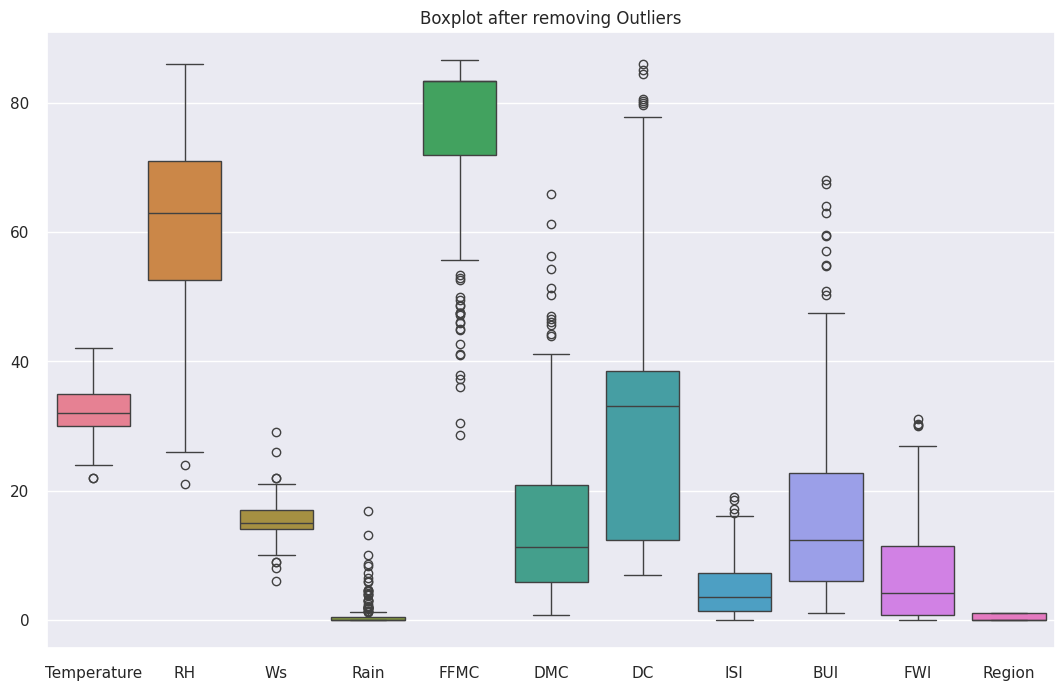

In [483]:
# Creating Boxplot after removing the outliers

plt.figure(figsize=(13, 8))
sns.boxplot(data=df_cleaned)
plt.title("Boxplot after removing Outliers")
plt.show()

**Creating Unseen Data**

In [484]:
# Randomly select 5 rows to remove
unseen_data = df_cleaned.sample(5, random_state=42)

# Create unseen data by removing the selected rows
df_cleaned = df_cleaned.drop(unseen_data.index)

print("Original data shape:", df_cleaned.shape)
print("Unseen data shape:", unseen_data.shape)

Original data shape: (238, 11)
Unseen data shape: (5, 11)


In [485]:
unseen_data    # Printing the unseen data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
24,31,64.0,15,0.0,83.3,14.2,63.8,5.7,18.3,8.4,0
6,33,54.0,13,0.0,83.3,9.9,30.5,6.4,10.9,7.2,0
152,28,58.0,18,2.2,63.7,3.2,8.5,1.2,3.3,0.5,1
232,34,58.0,13,0.2,79.5,18.7,33.1,2.1,24.4,3.8,1
238,30,65.0,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1


**Splitting the Data**

In [486]:
X=df_cleaned[['BUI', 'ISI', 'DC', 'DMC', 'FFMC', 'Rain', 'RH', 'Temperature']]
y=df_cleaned['FWI']

In [487]:
# Test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [488]:
X_train.shape, X_test.shape

((190, 8), (48, 8))

In [489]:
y_train.shape, y_test.shape

((190,), (48,))

**Feature Scaling or Standardization**

In [490]:
scaler=StandardScaler()
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)

In [491]:
X_train_sc

array([[-0.43831518, -0.82371417, -1.08433265, ...,  1.06713495,
        -0.50267047, -0.56745031],
       [ 0.09964   ,  0.52672016,  0.97364613, ..., -0.39018591,
        -0.72088994, -0.03105449],
       [ 0.57127195,  1.15370752,  1.71972603, ..., -0.34317556,
        -1.44828819,  2.11452877],
       ...,
       [-1.0868091 , -1.11309296, -1.16444862, ...,  1.3962074 ,
         1.24308532, -1.90843986],
       [-0.88783937, -0.65490988, -1.01423119, ..., -0.39018591,
        -0.64815012,  1.57813296],
       [-1.07943985, -1.11309296, -1.16444862, ...,  1.7722902 ,
         1.82500391, -1.90843986]])

<ipython-input-492-9e3b3fd28e03>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train After Scaling')

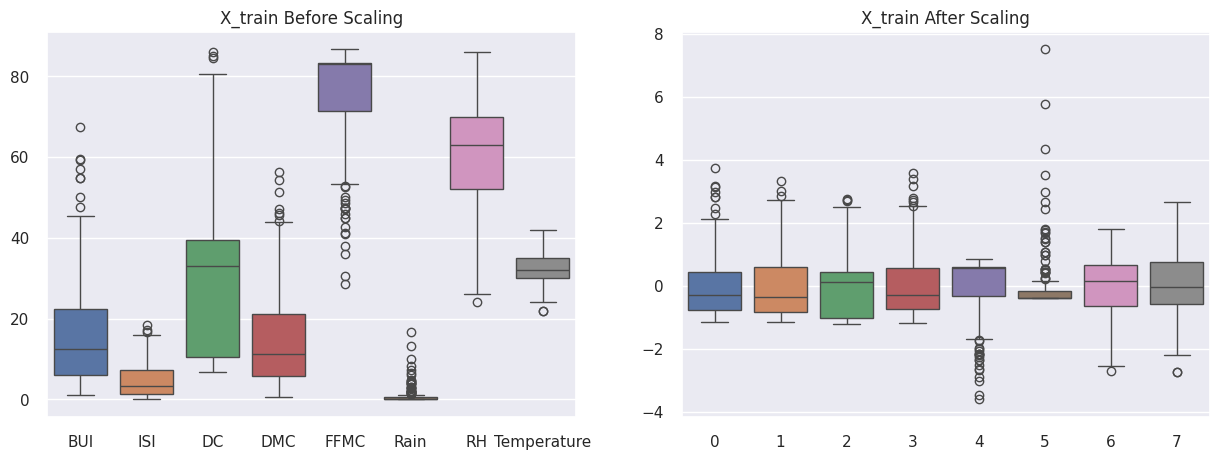

In [492]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_sc)
plt.title('X_train After Scaling')

# **Model Training**

**Multiple Linear Regression**

In [493]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(X_train_sc,y_train)

LinearRegression()

In [494]:
linreg.coef_, linreg.intercept_

(array([ 3.03090365,  5.55487413, -0.22190989,  0.14979946, -0.7346345 ,
        -0.02453871,  0.06571227, -0.04481509]),
 7.0200000000000005)

In [495]:
y_pred=linreg.predict(X_test_sc)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('R2 for Linear Regression:', r2)
print('mae for Linear Regression:', mae)
print('mse for Linear Regression:', mse)

R2 for Linear Regression: 0.912394677983976
mae for Linear Regression: 0.7827251753526955
mse for Linear Regression: 5.005109539154763


**Lasso Regression**

In [496]:
from sklearn.linear_model import Lasso
Lasso_Reg=Lasso()
Lasso_Reg.fit(X_train_sc, y_train)

Lasso()

In [497]:
lasso_y_pred=Lasso_Reg.predict(X_test_sc)

In [498]:
mse=mean_squared_error(y_test,lasso_y_pred)
r2=r2_score(y_test,lasso_y_pred)
mae=mean_absolute_error(y_test,lasso_y_pred)
print('R2 for Lasso:', r2)
print('mae for Lasso:', mae)
print('mse for Lasso:', mse)

R2 for Lasso: 0.9167849565411047
mae for Lasso: 1.282457163849677
mse for Lasso: 4.75428202570972


**Ridge Regression**

In [499]:
from sklearn.linear_model import Ridge
RR = Ridge()
RR.fit(X_train_sc, y_train)

Ridge()

In [500]:
y_pred=RR.predict(X_test_sc)

In [501]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print('R2 for Ridge:', r2)
print('mae for Ridge:', mae)
print('mse for Ridge:', mse)

R2 for Ridge: 0.9150900768712614
mae for Ridge: 0.7775587730781655
mse for Ridge: 4.851114709022044


**EasticNet Regression**

In [502]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(X_train_sc, y_train)

ElasticNet()

In [503]:
y_pred=elastic.predict(X_test_sc)

In [504]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print('R2 for ElasticNet:', r2)
print('mae for ElasticNet:', mae)
print('mse for ElasticNet:', mse)

R2 for ElasticNet: 0.927460366296872
mae for ElasticNet: 1.568390986228734
mse for ElasticNet: 4.14436936317532


**Assessment of Models' Performance:**

1. Overall, all four regression models perform reasonably well in predicting the target variable.
2. ElasticNet Regression has the highest R2 value and the lowest MSE, indicating that it explains a higher proportion of the variance in the target variable and has the lowest average squared difference between predicted and actual values.
3. Linear Regression and Ridge Regression have similar performance metrics, with slightly lower R2 values and MAE compared to Lasso Regression.
4. Lasso Regression has the highest MAE, suggesting slightly higher average prediction errors compared to the other models.

In summary, the ElasticNet Regression model seems to be the best-performing model based on the provided evaluation metrics. However, it's essential to consider other factors such as computational complexity, interpretability, and domain-specific requirements when selecting the most suitable regression model for a particular task.


# **4. Pickling the Model**

In [505]:
import pickle
pickle.dump(elastic, open('ElasticNet.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

**Purpose and benefits of pickling a model:**

Pickling a model allows to serialize and save its state, enabling persistence, portability, efficiency, versioning, scalability, and offline processing. This makes it easy to reuse trained models without retraining, share them across different environments, and deploy them in production systems.

# **5. Prediction on Unseen Data**

In [506]:
import pickle

# Specify the file paths for the model and scaler pickle files
model_file_path = 'ElasticNet.pkl'
scaler_file_path = 'scaler.pkl'

# Load the model from the pickle file
with open(model_file_path, 'rb') as f:
    loaded_model = pickle.load(f)

# Load the scaler from the pickle file
with open(scaler_file_path, 'rb') as f:
    loaded_scaler = pickle.load(f)

In [507]:
# Splitting the unseen data

X_unseen = unseen_data[['BUI', 'ISI', 'DC', 'DMC', 'FFMC', 'Rain', 'RH', 'Temperature']]   # Independent variables
y_unseen = unseen_data['FWI']                                # Dependent variable
X_unseen_sc = loaded_scaler.transform(X_unseen)

In [508]:
# Using the loaded model to predict FWI for unseen data

y_pred_unseen = loaded_model.predict(X_unseen_sc)
print("Predicted values for unseen data:", y_pred_unseen)

Predicted values for unseen data: [7.73178244 7.18419322 1.61775987 7.05423516 6.88725143]


In [509]:
# Using the same metrics for evaluating model performance on this unseen data

mse_unseen = mean_squared_error(y_unseen, y_pred_unseen)
mae_unseen = mean_absolute_error(y_unseen, y_pred_unseen)
r2_unseen = r2_score(y_unseen, y_pred_unseen)

# Print the results
print("MSE for unseen data:", mse_unseen)
print("MAE for unseen data:", mae_unseen)
print("R-squared for unseen data:", r2_unseen)

MSE for unseen data: 2.4872323669653134
MAE for unseen data: 1.0886541598303983
R-squared for unseen data: 0.6886912527579212
